C:\Users\MADHU\AppData\Local\Temp\ipykernel_22264\3180553986.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.resample('M').size().plot(title='Monthly Sightings Trend')


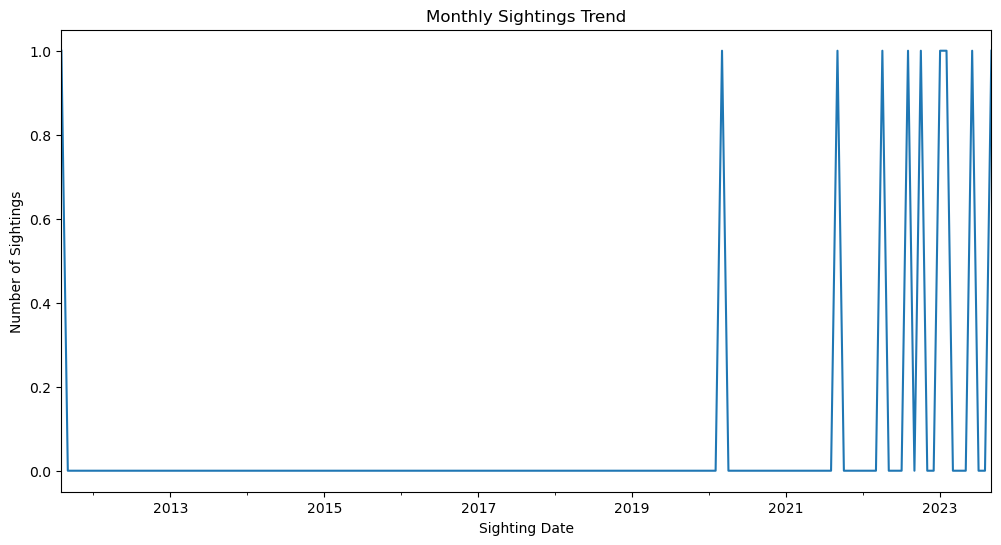

C:\Users\MADHU\AppData\Local\Temp\ipykernel_22264\3180553986.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Species Name Encoded'].resample('M').mean()


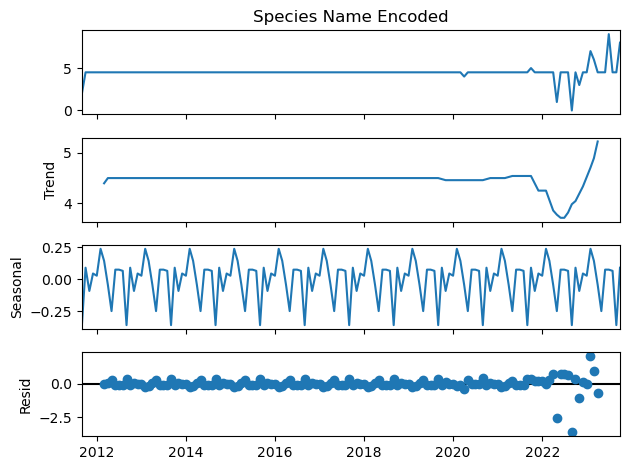

<Figure size 1200x600 with 0 Axes>

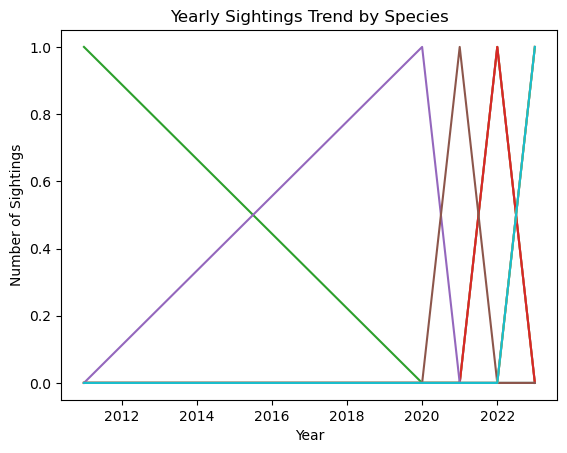

<Figure size 1200x600 with 0 Axes>

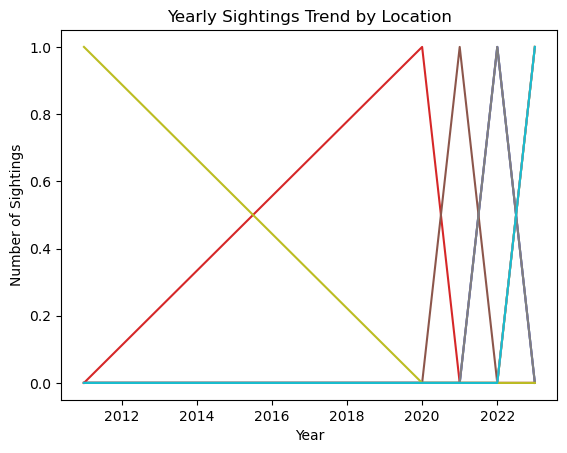

In [ ]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from statsmodels.tsa.seasonal import seasonal_decompose
 from sklearn.preprocessing import LabelEncoder
 

 # Load the dataset
 data = pd.read_csv("deepsea.csv")
 

 # Preprocess the 'Sighting Date' column
 data['Sighting Date'] = pd.to_datetime(data['Sighting Date'])
 

 # Set 'Sighting Date' as index for time series analysis
 data.set_index('Sighting Date', inplace=True)
 

 # Time Series Analysis
 

 # 1. Overall Sightings Trend
 plt.figure(figsize=(12, 6))
 data.resample('M').size().plot(title='Monthly Sightings Trend')
 plt.ylabel('Number of Sightings')
 plt.show()
 

 # 2. Seasonal Decomposition
 # Since 'Species Name' needs to be numerical for decomposition, let's convert it
 label_encoder = LabelEncoder()
 data['Species Name Encoded'] = label_encoder.fit_transform(data['Species Name'])
 

 # Resample data to ensure a consistent frequency for seasonal decomposition
 monthly_data = data['Species Name Encoded'].resample('M').mean()
 

 # Fill any missing values (NaNs) after resampling
 monthly_data = monthly_data.fillna(monthly_data.mean())  # Replace NaNs with the mean
 

 # Perform seasonal decomposition
 decomposition = seasonal_decompose(monthly_data, model='additive', period=12)  # Assuming yearly seasonality
 

 fig = decomposition.plot()
 plt.show()
 

 # 3. Species-Specific Trends
 plt.figure(figsize=(12, 6))
 species_counts = data.groupby([data.index.year, 'Species Name']).size().unstack(fill_value=0)
 species_counts.plot(kind='line', legend=False)
 plt.title('Yearly Sightings Trend by Species')
 plt.ylabel('Number of Sightings')
 plt.xlabel('Year')
 plt.show()
 

 # 4. Sighting Location Trends
 plt.figure(figsize=(12, 6))
 location_counts = data.groupby([data.index.year, 'Sighting Location']).size().unstack(fill_value=0)
 location_counts.plot(kind='line', legend=False)
 plt.title('Yearly Sightings Trend by Location')
 plt.ylabel('Number of Sightings')
 plt.xlabel('Year')
 plt.show()
 

 # Evaluating Trends and Seasonality
 # Time series analysis doesn't have a single "accuracy" score like classification or regression.
 # Instead, we interpret the patterns and trends.
 # Key observations include:
 # - Overall trend in sightings over time
 # - Seasonal patterns (e.g., more sightings in certain months)
 # - Species-specific trends (which species are sighted more frequently and when)
 # - Location-specific trends (where are sightings most common)
 

 # Further Analysis
 # - Statistical tests for stationarity (e.g., Augmented Dickey-Fuller test)
 # - Autocorrelation and partial autocorrelation plots (ACF/PACF)
 # - Forecasting using ARIMA models
